In [1]:
from __future__ import print_function
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split  
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
import itertools
%matplotlib inline
import csv

In [2]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [3]:
mushroom = pd.read_csv("newMushroom33noise.csv", sep=',')
mushroom.head()

,Unnamed: 0,Cap-shape,Cap-surface,Cap-color,Bruises,Odor,Gill-attachment,Gill-spacing,Gill-size,Gill-color,...,Stalk-color-above-ring,Stalk-color-below-ring,Veil-type,Veil-color,Ring-number,Ring-type,Spore-print-color,Population,Habitat,Class
0,0,1,0,-3,-3,-4,1,-7,-3,-2,...,1,-7,-3,4,3,3,-5,-4,2,p
1,1,0,0,1,1,1,0,0,1,0,...,0,0,1,0,2,0,1,1,1,e
2,2,1,0,2,1,2,0,0,1,1,...,0,0,1,0,2,0,1,1,2,e
3,3,-4,0,0,0,1,2,4,-1,0,...,2,0,2,-2,2,5,4,0,-5,p
4,4,0,0,3,0,3,0,1,1,0,...,0,0,1,0,2,1,1,2,1,e


In [4]:
appendicitis = pd.read_csv("appendicitis33noise.csv", sep=',')
appendicitis.head()

,Unnamed: 0,At1,At2,At3,At4,At5,At6,At7,Class
0,0,-1.469748,2.377381,0.285122,0.385282,1.148525,1.694152,0.736034,1
1,1,0.458000,0.714000,0.468000,0.111000,0.102000,0.741000,0.436000,1
2,2,0.102000,0.518000,0.111000,0.056000,0.022000,0.506000,0.086000,1
3,3,-0.071088,0.461360,-0.314657,1.432099,-0.282688,0.814856,-0.277706,1
4,4,0.236000,0.804000,0.289000,0.111000,0.066000,0.756000,0.241000,1


In [5]:
Glass = pd.read_csv("glass33noise.csv")
Glass.head()

,Unnamed: 0,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Class
0,0,1.032122,13.021202,5.053186,0.840775,69.811680,0.034397,8.376316,2.273795,-0.154925,1
1,1,1.517610,13.890000,3.600000,1.360000,72.730000,0.480000,7.830000,0.000000,0.000000,1
2,2,1.516180,13.530000,3.550000,1.540000,72.990000,0.390000,7.780000,0.000000,0.000000,1
3,3,1.927928,12.598376,4.216568,0.225725,73.227475,0.398198,6.976058,0.904381,0.969481,1
4,4,1.517420,13.270000,3.620000,1.240000,73.080000,0.550000,8.070000,0.000000,0.000000,1


In [6]:
print(mushroom.shape)
print(mushroom.groupby('Class').size())

(5644, 24)
Class
e    3488
p    2156
dtype: int64


In [7]:
print(appendicitis.shape)
print(appendicitis.groupby('Class').size())

(106, 9)
Class
0    85
1    21
dtype: int64


In [8]:
print(Glass.shape)
print(Glass.groupby("Class").size())

(214, 11)
Class
1    70
2    76
3    17
5    13
6     9
7    29
dtype: int64


In [9]:
data_mushroom = mushroom.iloc[:,1:23]
labels_mushroom = mushroom.iloc[:,23].astype(str)

In [10]:
data_appendicitis = appendicitis.iloc[:,1:8]
labels_appendicitis = appendicitis.iloc[:,8].astype(str)

In [11]:
data_Glass = Glass.iloc[:,1:10]
labels_Glass = Glass.iloc[:,10].astype(str)

In [12]:
kf = KFold(n_splits=2, shuffle=True) #5 fores me 2 folds

## Decision Tree for Mushroom Dataset

              precision    recall  f1-score   support

           e       0.80      0.78      0.79      1734
           p       0.66      0.68      0.67      1088

   micro avg       0.74      0.74      0.74      2822
   macro avg       0.73      0.73      0.73      2822
weighted avg       0.74      0.74      0.74      2822

accuracy:  0.7409638554216867


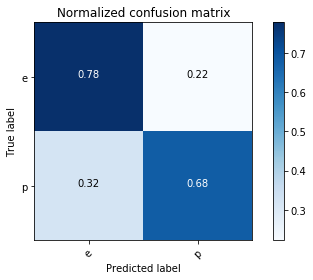

              precision    recall  f1-score   support

           e       0.81      0.81      0.81      1754
           p       0.69      0.69      0.69      1068

   micro avg       0.77      0.77      0.77      2822
   macro avg       0.75      0.75      0.75      2822
weighted avg       0.77      0.77      0.77      2822

accuracy:  0.7668320340184267


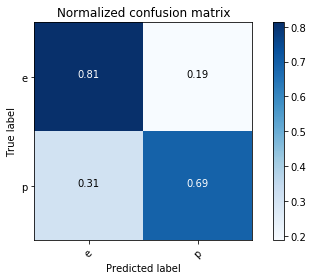

              precision    recall  f1-score   support

           e       0.83      0.80      0.81      1791
           p       0.67      0.71      0.69      1031

   micro avg       0.76      0.76      0.76      2822
   macro avg       0.75      0.75      0.75      2822
weighted avg       0.77      0.76      0.77      2822

accuracy:  0.7647058823529411


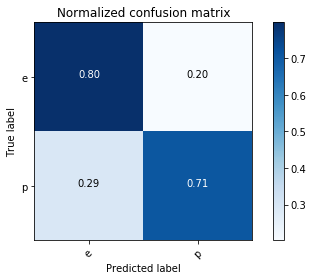

              precision    recall  f1-score   support

           e       0.79      0.81      0.80      1697
           p       0.70      0.68      0.69      1125

   micro avg       0.75      0.75      0.75      2822
   macro avg       0.74      0.74      0.74      2822
weighted avg       0.75      0.75      0.75      2822

accuracy:  0.7540751240255138


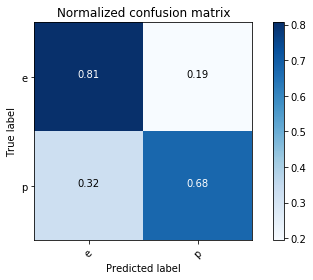

              precision    recall  f1-score   support

           e       0.81      0.80      0.80      1749
           p       0.67      0.69      0.68      1073

   micro avg       0.75      0.75      0.75      2822
   macro avg       0.74      0.74      0.74      2822
weighted avg       0.76      0.75      0.76      2822

accuracy:  0.7547838412473423


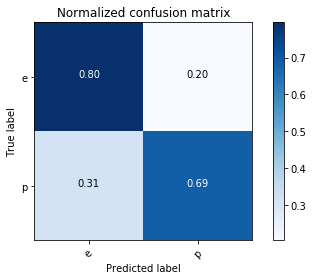

              precision    recall  f1-score   support

           e       0.81      0.81      0.81      1739
           p       0.70      0.70      0.70      1083

   micro avg       0.77      0.77      0.77      2822
   macro avg       0.75      0.75      0.75      2822
weighted avg       0.77      0.77      0.77      2822

accuracy:  0.7671863926293409


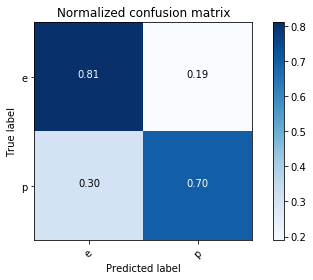

              precision    recall  f1-score   support

           e       0.81      0.81      0.81      1761
           p       0.68      0.69      0.69      1061

   micro avg       0.76      0.76      0.76      2822
   macro avg       0.75      0.75      0.75      2822
weighted avg       0.76      0.76      0.76      2822

accuracy:  0.7625797306874557


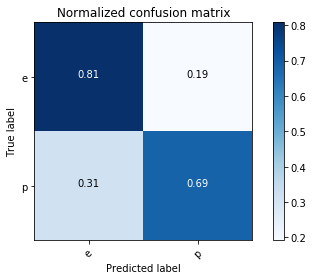

              precision    recall  f1-score   support

           e       0.80      0.81      0.81      1727
           p       0.70      0.67      0.68      1095

   micro avg       0.76      0.76      0.76      2822
   macro avg       0.75      0.74      0.74      2822
weighted avg       0.76      0.76      0.76      2822

accuracy:  0.7590361445783133


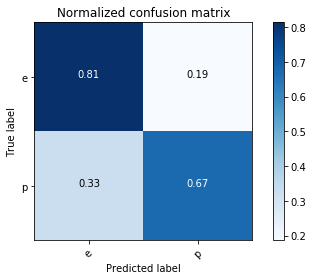

              precision    recall  f1-score   support

           e       0.80      0.81      0.80      1730
           p       0.69      0.68      0.68      1092

   micro avg       0.76      0.76      0.76      2822
   macro avg       0.74      0.74      0.74      2822
weighted avg       0.76      0.76      0.76      2822

accuracy:  0.7569099929128278


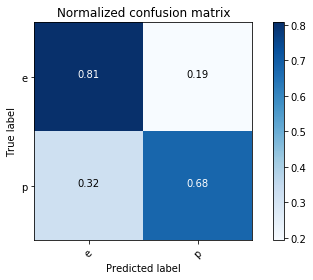

              precision    recall  f1-score   support

           e       0.82      0.80      0.81      1758
           p       0.68      0.70      0.69      1064

   micro avg       0.76      0.76      0.76      2822
   macro avg       0.75      0.75      0.75      2822
weighted avg       0.77      0.76      0.76      2822

accuracy:  0.7632884479092842


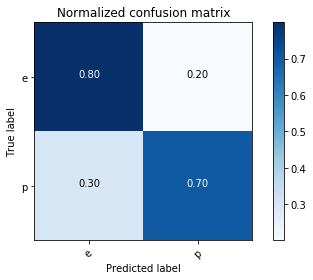

In [13]:
acc=[]
acc.append("Mushroom")
for i in range(5):
    for train_index, test_index in kf.split(mushroom):
        X_train, X_test = data_mushroom.iloc[train_index], data_mushroom.iloc[test_index]
        y_train, y_test = labels_mushroom[train_index], labels_mushroom[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        dt_model = DecisionTreeClassifier()
        dt_model.fit(X_train, y_train)
        predicted = dt_model.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            #print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        acc.append(accuracy_score(y_test, predicted))
        print (classification_report(y_test, predicted, target_names=unique_labels))
        print ("accuracy: ", accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

## Decision Tree for Appendicitis Dataset

              precision    recall  f1-score   support

           1       0.83      0.88      0.85        43
           0       0.29      0.20      0.24        10

   micro avg       0.75      0.75      0.75        53
   macro avg       0.56      0.54      0.54        53
weighted avg       0.72      0.75      0.74        53

accuracy:  0.7547169811320755


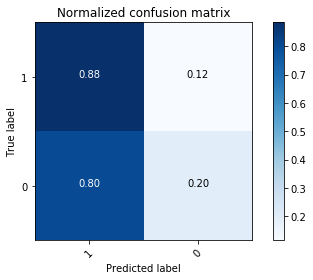

              precision    recall  f1-score   support

           1       0.89      0.98      0.93        42
           0       0.86      0.55      0.67        11

   micro avg       0.89      0.89      0.89        53
   macro avg       0.87      0.76      0.80        53
weighted avg       0.88      0.89      0.88        53

accuracy:  0.8867924528301887


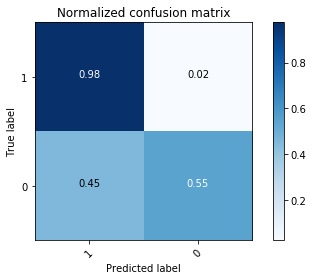

              precision    recall  f1-score   support

           1       0.88      0.86      0.87        42
           0       0.50      0.55      0.52        11

   micro avg       0.79      0.79      0.79        53
   macro avg       0.69      0.70      0.69        53
weighted avg       0.80      0.79      0.80        53

accuracy:  0.7924528301886793


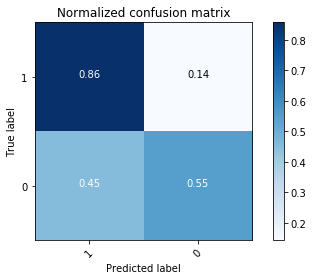

              precision    recall  f1-score   support

           1       0.81      0.81      0.81        43
           0       0.20      0.20      0.20        10

   micro avg       0.70      0.70      0.70        53
   macro avg       0.51      0.51      0.51        53
weighted avg       0.70      0.70      0.70        53

accuracy:  0.6981132075471698


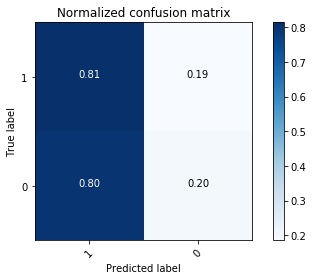

              precision    recall  f1-score   support

           1       0.83      0.83      0.83        42
           0       0.36      0.36      0.36        11

   micro avg       0.74      0.74      0.74        53
   macro avg       0.60      0.60      0.60        53
weighted avg       0.74      0.74      0.74        53

accuracy:  0.7358490566037735


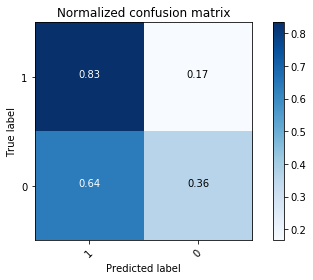

              precision    recall  f1-score   support

           1       0.93      0.86      0.89        43
           0       0.54      0.70      0.61        10

   micro avg       0.83      0.83      0.83        53
   macro avg       0.73      0.78      0.75        53
weighted avg       0.85      0.83      0.84        53

accuracy:  0.8301886792452831


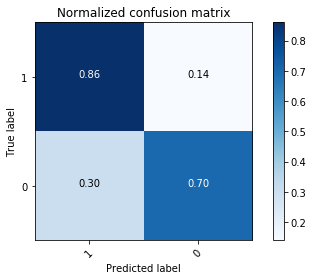

              precision    recall  f1-score   support

           1       0.86      0.82      0.84        45
           0       0.20      0.25      0.22         8

   micro avg       0.74      0.74      0.74        53
   macro avg       0.53      0.54      0.53        53
weighted avg       0.76      0.74      0.75        53

accuracy:  0.7358490566037735


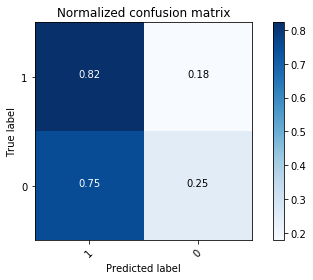

              precision    recall  f1-score   support

           1       0.82      0.82      0.82        40
           0       0.46      0.46      0.46        13

   micro avg       0.74      0.74      0.74        53
   macro avg       0.64      0.64      0.64        53
weighted avg       0.74      0.74      0.74        53

accuracy:  0.7358490566037735


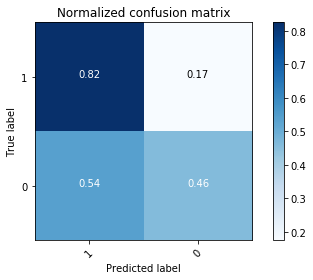

              precision    recall  f1-score   support

           1       0.91      0.89      0.90        44
           0       0.50      0.56      0.53         9

   micro avg       0.83      0.83      0.83        53
   macro avg       0.70      0.72      0.71        53
weighted avg       0.84      0.83      0.83        53

accuracy:  0.8301886792452831


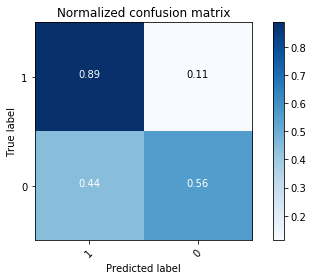

              precision    recall  f1-score   support

           1       0.85      0.83      0.84        41
           0       0.46      0.50      0.48        12

   micro avg       0.75      0.75      0.75        53
   macro avg       0.66      0.66      0.66        53
weighted avg       0.76      0.75      0.76        53

accuracy:  0.7547169811320755


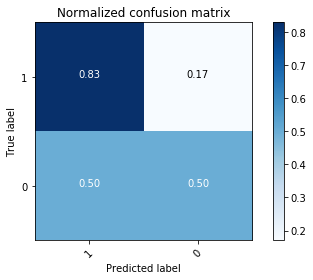

In [14]:
acc.append("Appendicitis")
for i in range(5):
    for train_index, test_index in kf.split(appendicitis):
        X_train, X_test = data_appendicitis.iloc[train_index], data_appendicitis.iloc[test_index]
        y_train, y_test = labels_appendicitis[train_index], labels_appendicitis[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        dt_model = DecisionTreeClassifier()
        dt_model.fit(X_train, y_train)
        predicted = dt_model.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            #print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        acc.append(accuracy_score(y_test, predicted))
        print (classification_report(y_test, predicted, target_names=unique_labels))
        print ("accuracy: ", accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

## Decision Tree for Glass Dataset

              precision    recall  f1-score   support

           6       0.66      0.66      0.66        41
           2       0.55      0.58      0.56        31
           3       0.33      0.22      0.27         9
           1       0.33      0.50      0.40         6
           5       0.29      0.50      0.36         4
           7       0.73      0.50      0.59        16

   micro avg       0.56      0.56      0.56       107
   macro avg       0.48      0.49      0.47       107
weighted avg       0.58      0.56      0.56       107

accuracy:  0.5607476635514018


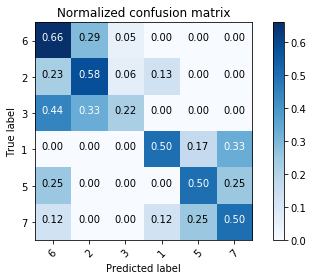

              precision    recall  f1-score   support

           6       0.50      0.62      0.55        29
           2       0.69      0.49      0.57        45
           3       0.12      0.25      0.17         8
           1       0.67      0.29      0.40         7
           5       0.00      0.00      0.00         5
           7       0.68      1.00      0.81        13

   micro avg       0.53      0.53      0.53       107
   macro avg       0.44      0.44      0.42       107
weighted avg       0.56      0.53      0.53       107

accuracy:  0.5327102803738317


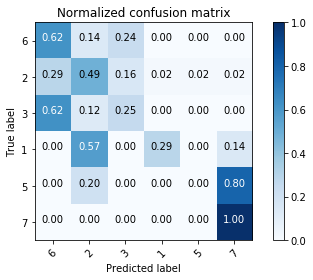

              precision    recall  f1-score   support

           6       0.79      0.54      0.64        41
           2       0.53      0.79      0.64        34
           3       0.33      0.14      0.20         7
           1       0.60      0.43      0.50         7
           5       0.33      0.33      0.33         3
           7       0.65      0.73      0.69        15

   micro avg       0.61      0.61      0.61       107
   macro avg       0.54      0.49      0.50       107
weighted avg       0.63      0.61      0.60       107

accuracy:  0.6074766355140186


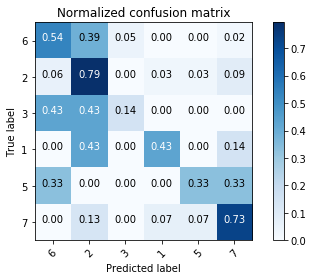

              precision    recall  f1-score   support

           6       0.59      0.66      0.62        29
           2       0.64      0.64      0.64        42
           3       0.20      0.10      0.13        10
           1       0.43      0.50      0.46         6
           5       0.33      0.33      0.33         6
           7       0.67      0.71      0.69        14

   micro avg       0.58      0.58      0.58       107
   macro avg       0.48      0.49      0.48       107
weighted avg       0.56      0.58      0.57       107

accuracy:  0.5794392523364486


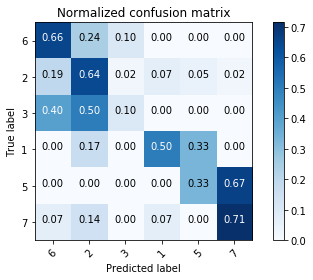

              precision    recall  f1-score   support

           6       0.65      0.39      0.49        38
           2       0.48      0.57      0.52        40
           3       0.18      0.25      0.21         8
           1       0.50      0.50      0.50         6
           5       0.20      0.50      0.29         2
           7       0.64      0.69      0.67        13

   micro avg       0.50      0.50      0.50       107
   macro avg       0.44      0.49      0.45       107
weighted avg       0.53      0.50      0.50       107

accuracy:  0.4953271028037383


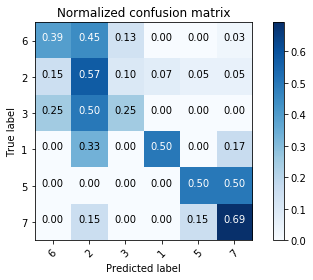

              precision    recall  f1-score   support

           6       0.66      0.78      0.71        32
           2       0.57      0.58      0.58        36
           3       0.50      0.33      0.40         9
           1       0.22      0.29      0.25         7
           5       1.00      0.29      0.44         7
           7       0.73      0.69      0.71        16

   micro avg       0.60      0.60      0.60       107
   macro avg       0.61      0.49      0.52       107
weighted avg       0.62      0.60      0.59       107

accuracy:  0.5981308411214953


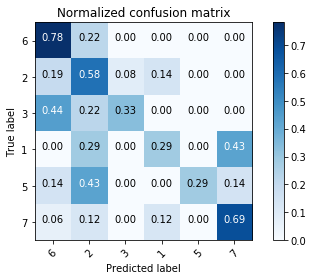

              precision    recall  f1-score   support

           6       0.64      0.55      0.59        38
           2       0.53      0.59      0.56        32
           3       0.18      0.33      0.24         6
           1       0.20      0.12      0.15         8
           5       0.29      0.50      0.36         4
           7       0.87      0.68      0.76        19

   micro avg       0.54      0.54      0.54       107
   macro avg       0.45      0.46      0.44       107
weighted avg       0.57      0.54      0.55       107

accuracy:  0.5420560747663551


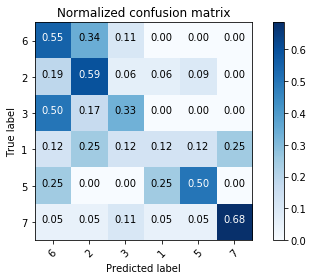

              precision    recall  f1-score   support

           6       0.47      0.53      0.50        32
           2       0.54      0.61      0.57        44
           3       0.25      0.09      0.13        11
           1       0.25      0.20      0.22         5
           5       0.00      0.00      0.00         5
           7       0.80      0.80      0.80        10

   micro avg       0.50      0.50      0.50       107
   macro avg       0.39      0.37      0.37       107
weighted avg       0.48      0.50      0.48       107

accuracy:  0.5046728971962616


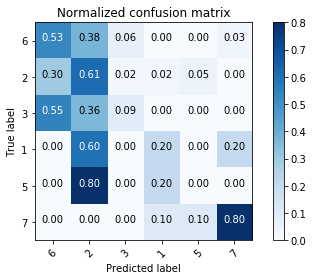

              precision    recall  f1-score   support

           6       0.56      0.66      0.61        35
           2       0.50      0.45      0.47        31
           3       0.20      0.25      0.22         8
           1       0.40      0.22      0.29         9
           5       0.22      0.40      0.29         5
           7       0.79      0.58      0.67        19

   micro avg       0.50      0.50      0.50       107
   macro avg       0.44      0.43      0.42       107
weighted avg       0.53      0.50      0.51       107

accuracy:  0.5046728971962616


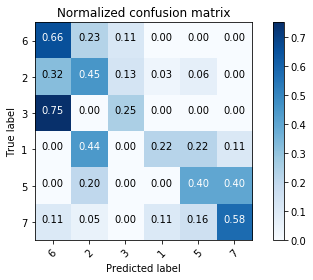

              precision    recall  f1-score   support

           6       0.43      0.34      0.38        35
           2       0.56      0.60      0.58        45
           3       0.17      0.11      0.13         9
           1       0.50      0.50      0.50         4
           5       0.00      0.00      0.00         4
           7       0.53      0.80      0.64        10

   micro avg       0.47      0.47      0.47       107
   macro avg       0.37      0.39      0.37       107
weighted avg       0.46      0.47      0.46       107

accuracy:  0.4672897196261682


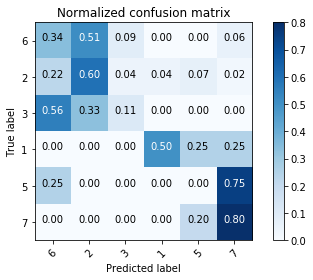

In [15]:
acc.append("Glass")
for i in range(5):
    for train_index, test_index in kf.split(Glass):
        X_train, X_test = data_Glass.iloc[train_index], data_Glass.iloc[test_index]
        y_train, y_test = labels_Glass[train_index], labels_Glass[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        dt_model = DecisionTreeClassifier()
        dt_model.fit(X_train, y_train)
        predicted = dt_model.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            #print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        acc.append(accuracy_score(y_test, predicted))
        print (classification_report(y_test, predicted, target_names=unique_labels))
        print ("accuracy: ", accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

In [16]:
with open("accDTWith33Noise.csv", 'w') as myfile:
    wr = csv.writer(myfile, delimiter='\n')
    wr.writerow(acc)